## Car Price Prediction Model

In [197]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
# Loading the Dataset

cars = pd.read_csv('/home/christine/Desktop/car price/Car-Price-Prediction-Challenge/car_price_prediction.csv',index_col = 0)

In [199]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [200]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-nu

In [201]:
cars.shape

(19237, 17)

In [202]:
cars.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [203]:
cars['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
84541 km       1
296391 km      1
576605 km      1
29853 km       1
109497 km      1
Name: Mileage, Length: 7687, dtype: int64

## Data Cleaning

In [204]:
# Removing km from mileage column

cars['Mileage'] = cars.Mileage.str.replace('km','')

In [205]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [206]:
cars.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [207]:
# Changing Prod.year column from int to date

cars['Prod. year'] = pd.to_datetime(cars['Prod. year'],format = '%Y')

In [208]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price             19237 non-null  int64         
 1   Levy              19237 non-null  object        
 2   Manufacturer      19237 non-null  object        
 3   Model             19237 non-null  object        
 4   Prod. year        19237 non-null  datetime64[ns]
 5   Category          19237 non-null  object        
 6   Leather interior  19237 non-null  object        
 7   Fuel type         19237 non-null  object        
 8   Engine volume     19237 non-null  object        
 9   Mileage           19237 non-null  object        
 10  Cylinders         19237 non-null  float64       
 11  Gear box type     19237 non-null  object        
 12  Drive wheels      19237 non-null  object        
 13  Doors             19237 non-null  object        
 14  Wheel       

In [209]:
# Investigate the Engine volume column
cars['Engine volume'].value_counts()

#Removing Turbo from Engine volume column
cars['Engine volume'] = cars['Engine volume'].str.replace('Turbo','')

#converting the engine volume column to float
cars['Engine volume'] = cars['Engine volume'].astype(float)



In [210]:
#replace '-' with 0
cars['Levy'] = cars['Levy'].replace('-',0)

#Converting Levy column to float
cars['Levy'] = cars['Levy'].astype(float)

In [211]:
#converting mileage column to float
cars['Mileage'] = cars['Mileage'].astype(float)

In [212]:
#converting doors column to int
cars['Doors']= cars['Doors'].replace('04-May',4).replace('02-Mar',2).replace('>5',5)

In [213]:
cars.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,632.528669,2.307990,1.532236e+06,4.582991,3.925872,6.582627
std,1.905813e+05,567.721688,0.877805,4.840387e+07,1.199933,0.403399,4.320168
min,1.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,2.207500e+04,917.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


## Exploratory Data Analysis

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution')

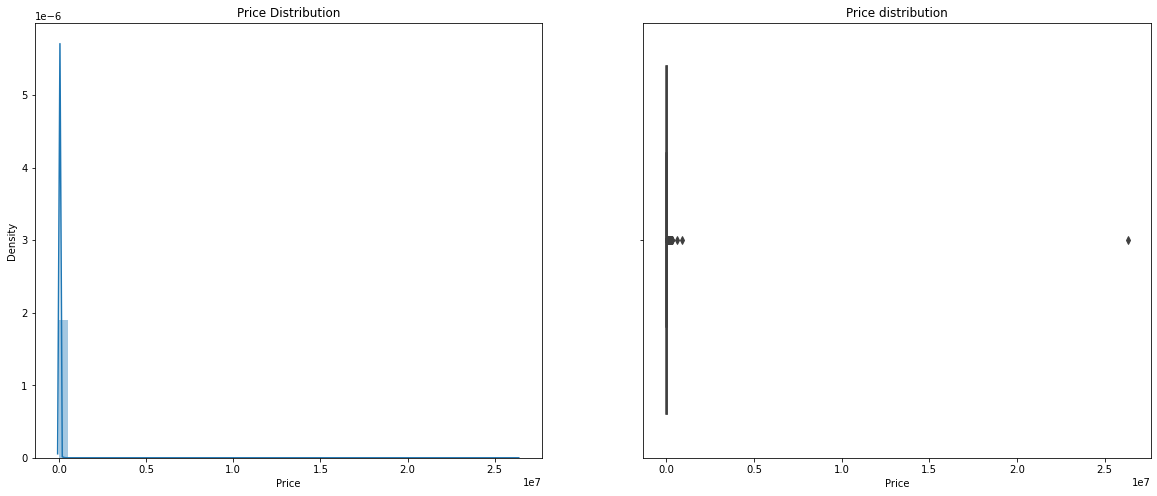

In [214]:
# Visualizing the dependent variable distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(cars.Price)
plt.title('Price Distribution')


plt.subplot(1,2,2)
sns.boxplot(cars.Price)
plt.title('Price distribution')

In [215]:
#Checking for outliers in the price column
acars[cars['Price']> 600000]


NameError: name 'acars' is not defined

In [ ]:
# Dropping more outliers in the price column
data_dropped =cars[cars['Price']>600000]

cars = cars.drop(data_dropped.index,axis = 0)


/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution')

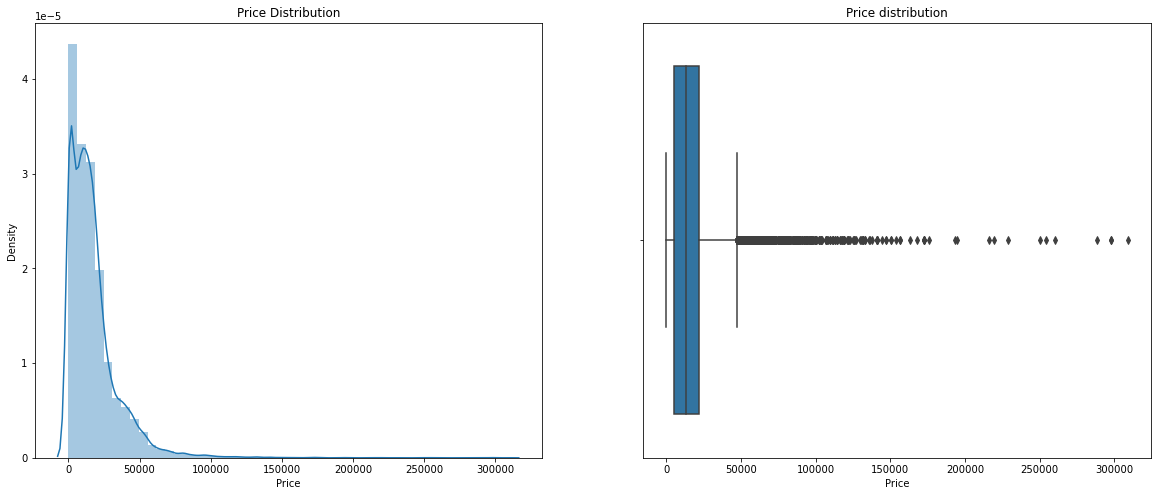

In [ ]:
# Visualizing the dependent variable distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(cars.Price)
plt.title('Price Distribution')


plt.subplot(1,2,2)
sns.boxplot(cars.Price)
plt.title('Price distribution')

In [ ]:
cars.Price.describe(percentiles=[0.25,0.5,0.75,0.85,0.90,1])

count     19234.000000
mean      17113.065717
std       18278.647663
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22063.000000
85%       30734.000000
90%       38574.000000
100%     308906.000000
max      308906.000000
Name: Price, dtype: float64

$ Inference $
* The data  is skewed to the right meaning most prices in the dataset are below ```20000```
* There is a significance difference between the mean and median
* The data points are far spread out from the mean which indicates a high variance in the price 75% of the prices are below ```22063``` whereas the remaining 25% are between ```30734``` and ```308906```




## Visualizing Categorical Variables

In [ ]:
cat_variables = cars.select_dtypes(include= ['object']).columns
cat_variables

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

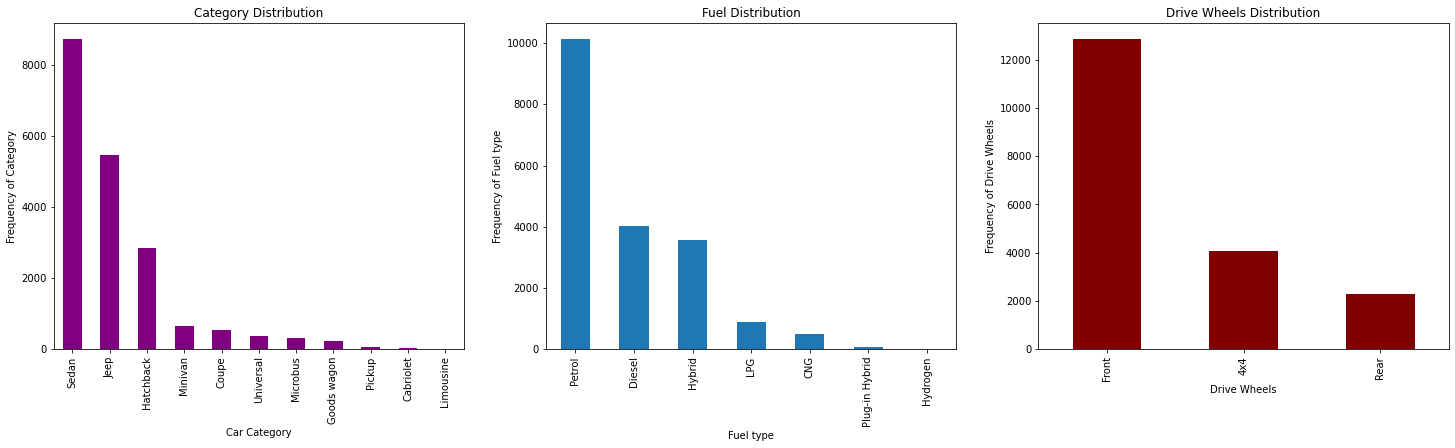

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars.Category.value_counts().plot(kind='bar',color = 'purple')
plt.title('Category Distribution')
plt1.set(xlabel = 'Car Category',ylabel = 'Frequency of Category')

plt.subplot(1,3,2)
plt1 = cars['Fuel type'].value_counts().plot(kind='bar')
plt.title('Fuel Distribution')
plt1.set(xlabel = 'Fuel type',ylabel = 'Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = cars['Drive wheels'].value_counts().plot(kind='bar',color ='maroon')
plt.title('Drive Wheels Distribution')
plt1.set(xlabel = 'Drive Wheels',ylabel = 'Frequency of Drive Wheels')

plt.show()

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


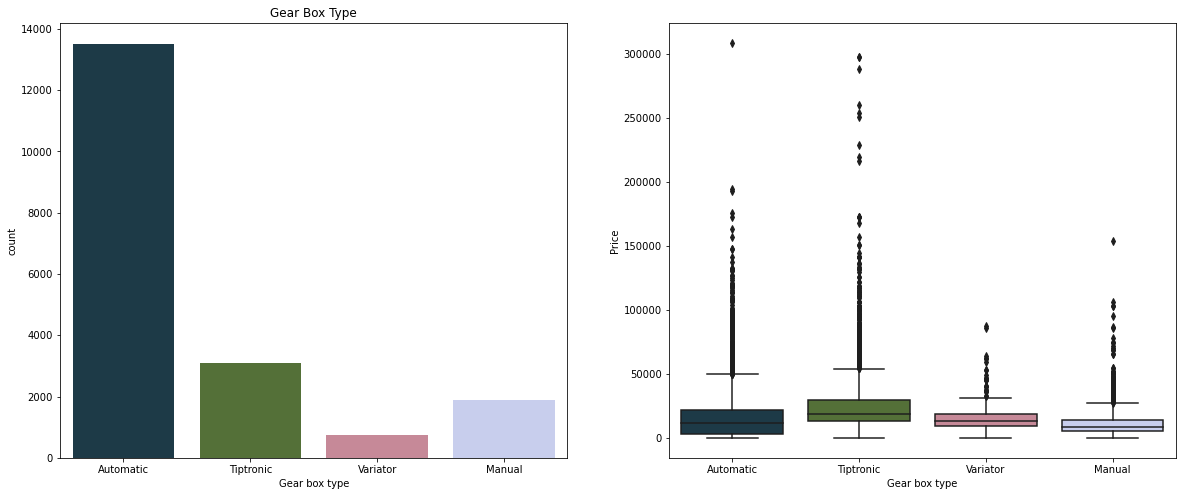

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(cars['Gear box type'],palette= ('cubehelix'))
plt.title('Gear Box Type')


plt.subplot(1,2,2)
sns.boxplot(x=cars['Gear box type'],y = cars.Price,palette=('cubehelix'))
plt.title
plt.show()

## Distribution of Categorical Variables against Price